# Analysis of the LEGO online store

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime

LOADING DATA

In [2]:
df = pd.read_csv('C:/Users/Desktop/Desktop/VisualStudioCode/LEGO_Analysis/Data/zamowienia1.csv', encoding='utf-8', sep=';')


COUNTS HOW MANY ORDERS THERE ARE IN TOTAL

In [3]:
# Pokazuje ile jest wszystkich zamówień

numer_of_orders = df['order_id'].count()
print(numer_of_orders)

837


COUNTS HOW MANY LEGO ORDERS THERE ARE IN TOTAL

In [17]:
# Pokazuje, ile firma sprzedała zestawów LEGO

lego_orders = 0

for index, row in df.iterrows():
    found_lego = False
    for col in [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]:
        product = row[col]
    
        if isinstance(product, str) and product.startswith('LEGO'):
            product_code = product[5:9]
            
            if product_code.isdigit() and len(product_code) in [3,4]:
                found_lego = True
                break
                
    if found_lego:
        lego_orders += 1
                
print(f'Number of orders containing LEGO products: {lego_orders}')
            

Number of orders containing LEGO products: 669


MONTHLY INCOME

   Date  Revenues
 2022-7    969.96
 2022-8   5083.67
 2022-9   8179.56
2022-10   7033.56
2022-11  11290.97
2022-12  15668.81
 2023-1   8500.32
 2023-2  11154.18
 2023-3   8000.15
 2023-4   6674.01
 2023-5  11055.94
 2023-6  18399.00
 2023-7  15026.26
 2023-8   9547.96
 2023-9  15537.16
2023-10  13615.97
2023-11  12510.69
2023-12  14505.61
 2024-1  10879.70
 2024-2  15710.71
 2024-3   7086.86
 2024-4   5056.18
 2024-5   8734.10
 2024-6    260.94


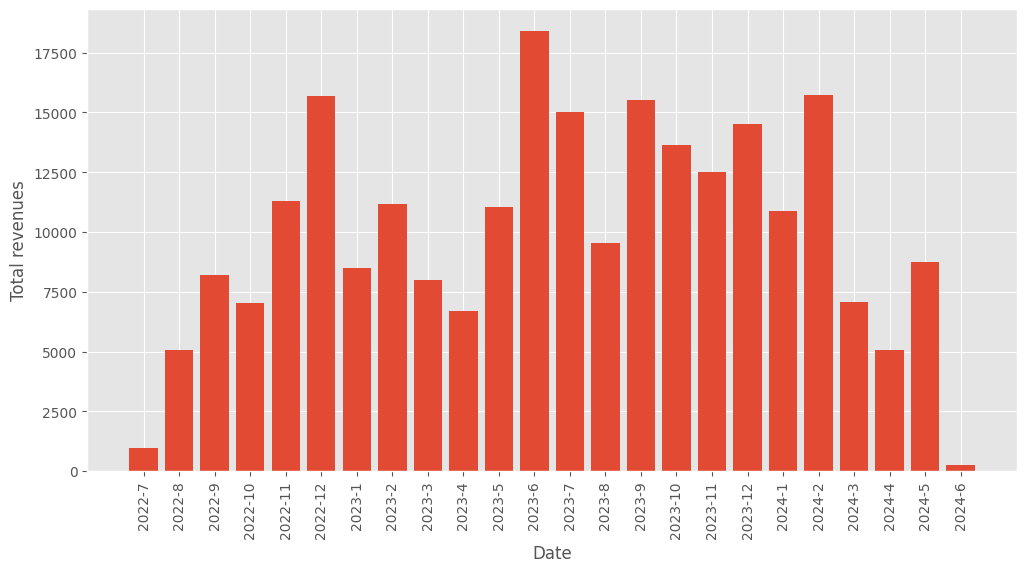

In [18]:
# Miesięczny przychód za wszystkie produkty

df['date'] = pd.to_datetime(df['date'])

grouped_data = df.groupby([df['date'].dt.year, df['date'].dt.month])

monthly_revenues = {}


for (year, month), group in grouped_data:
    monthly_revenue = round(group['sum'].sum(), 2)
    monthly_revenues[f'{year}-{month}'] = monthly_revenue
    # print(f'Revenue for the month {year}-{month}: {monthly_revenue}')

months_years = list(monthly_revenues.keys())
monthly_values = list(monthly_revenues.values())

results_monthly = pd.DataFrame(list(monthly_revenues.items()), columns=['Date', 'Revenues'])
print(results_monthly.to_string(index=False))

plt.figure(figsize=(12,6))
plt.bar(months_years, monthly_values)
plt.xlabel('Date')
plt.ylabel('Total revenues')
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.show()



MONTHLY INCOME FOR LEGO lego_sets

   Date  Revenues
 2022-7    969.96
 2022-8   5083.67
 2022-9   8179.56
2022-10   7033.56
2022-11  11290.97
2022-12  15668.81
 2023-1   8500.32
 2023-2  11154.18
 2023-3   8000.15
 2023-4   6674.01
 2023-5  11055.94
 2023-6  18399.00
 2023-7  15026.26
 2023-8   9547.96
 2023-9  15537.16
2023-10  13615.97
2023-11  12510.69
2023-12  14505.61
 2024-1  10879.70
 2024-2  15710.71
 2024-3   7086.86
 2024-4   5056.18
 2024-5   8734.10
 2024-6    260.94


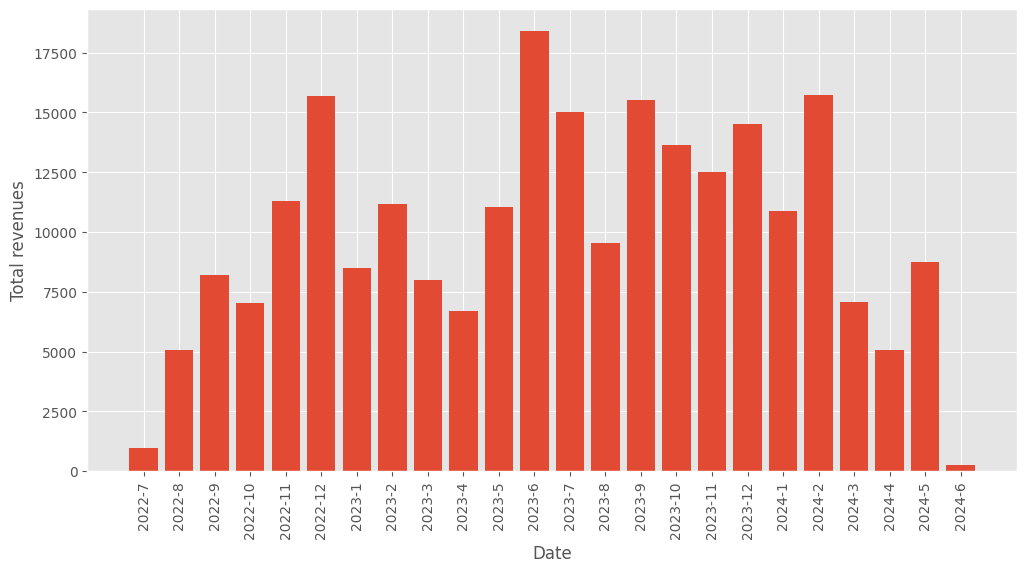

In [6]:
# Miesięczny przychód za same zestawy LEGO 
# NIEDOKOŃCZONE

for col in [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]:
        unique_products = df[col].dropna().unique()
    
        for product_name in unique_products:
            if isinstance(product_name, str) and product_name.startswith('LEGO'):
                product_code = product_name[5:9]
                
                if product_code.isdigit() and len(product_code) in [3, 4]:
                    df['date'] = pd.to_datetime(df['date'])

                    grouped_data = df.groupby([df['date'].dt.year, df['date'].dt.month])

                    monthly_revenues = {}


                    for (year, month), group in grouped_data:
                        monthly_revenue = round(group['sum'].sum(), 2)
                        monthly_revenues[f'{year}-{month}'] = monthly_revenue
    # print(f'Revenue for the month {year}-{month}: {monthly_revenue}')

months_years = list(monthly_revenues.keys())
montly_values = list(monthly_revenues.values())

results_monthly = pd.DataFrame(list(monthly_revenues.items()), columns=['Date', 'Revenues'])
print(results_monthly.to_string(index=False))

plt.figure(figsize=(12,6))
plt.bar(months_years, montly_values)
plt.xlabel('Date')
plt.ylabel('Total revenues')
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.show()


THE BEST MONTH

The best month in terms of revenues comes is: 2023-6 and amounts to 18399.0

     LEGO set  Number of orders
0   LEGO 6008                16
1  LEGO 32171                16
2   LEGO 6020                14
3   LEGO 6007                10
4   LEGO 6034                10
5   LEGO 6246                 9
6   LEGO 6235                 9
7   LEGO 6125                 9
8   LEGO 6790                 8
9   LEGO 6712                 8
      LEGO set  Number of orders
0    LEGO 6008                16
23    LEGO 608                 7
70  LEGO 80547                 3


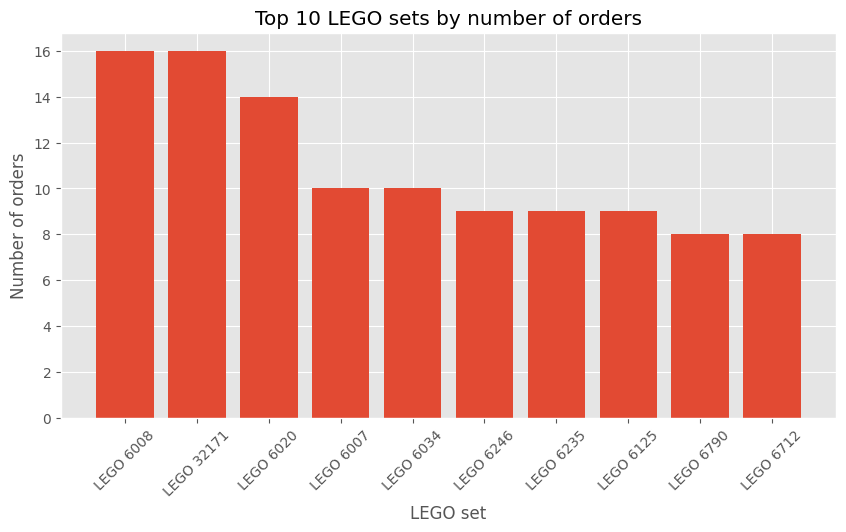

In [19]:
# Najlepszy miesiąc pod względem przychodów

max_monthly_revenues = max(monthly_revenues.values())

for key, value in monthly_revenues.items():
    if value == max_monthly_revenues:
        print(f'The best month in terms of revenues comes is: {key} and amounts to {value}\n')




# Najlepszy miesiąc pod względem sprzedanych zestawów LEGO
lego_sets = {}

pattern = re.compile(r'LEGO (\d+)')

for col in [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]:
    unique_products = df[col].dropna().unique()
    
    for product_name in unique_products:
        if isinstance(product_name, str):
            match = pattern.match(product_name)
            
            if match:
                product_code = match.group(1)
                product = f'LEGO {product_code}'
                
                if product not in lego_sets:
                    lego_sets[product] = 0
                    
                sum_value = (df[col] == product_name).sum()
                lego_sets[product] += sum_value
                
sorted_product = dict(sorted(lego_sets.items(), key=lambda item: item[1], reverse=True))    

results_df = pd.DataFrame(list(sorted_product.items()), columns=['LEGO set', 'Number of orders'])      

top_10_df = results_df.head(10)
print(top_10_df)  


specific_sets = ['LEGO 6008', 'LEGO 80547', 'LEGO 608']
filtered_df = results_df[results_df['LEGO set'].isin(specific_sets)]
print(filtered_df)

plt.figure(figsize=(10,5))
plt.bar(top_10_df['LEGO set'], top_10_df['Number of orders'])
plt.title('Top 10 LEGO sets by number of orders')
plt.xlabel('LEGO set')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.show()

# lego_sets = {}


# for col in [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]:
#     unique_products = df[col].dropna().unique()
    
#     for product_name in unique_products:
#         if isinstance(product_name, str) and product_name.startswith('LEGO'):
#             product_code = product_name[5:9]
            
#             if product_code.isdigit() and len(product_code) in [3, 4]:
#                 product = f'LEGO {product_code}'
                
#                 if product not in lego_sets:
#                     lego_sets[product] = 0
                
#                 sum_value = (df[col] == product_name).sum()
#                 lego_sets[product] += sum_value

# sorted_product = dict(sorted(lego_sets.items(), key=lambda item: item[1], reverse=True))
# # print(sorted_product)
# # print(lego_sets)


# results_df = pd.DataFrame(list(sorted_product.items()), columns=['LEGO set', 'Number of orders'])

# top_10_df = results_df.head(10)
# print(top_10_df)

# plt.figure(figsize=(10,5))
# plt.bar(top_10_df['LEGO set'], top_10_df['Number of orders'])
# plt.title('Top 10 LEGO lego_sets by number of orders')
# plt.xlabel('LEGO set')
# plt.ylabel('Number of orders')
# plt.xticks(rotation = 45)
# plt.show()

The best month in terms of revenues comes is: 2023-6 and amounts to 18399.0

banana
Empty DataFrame
Columns: [LEGO set, Number of orders]
Index: []


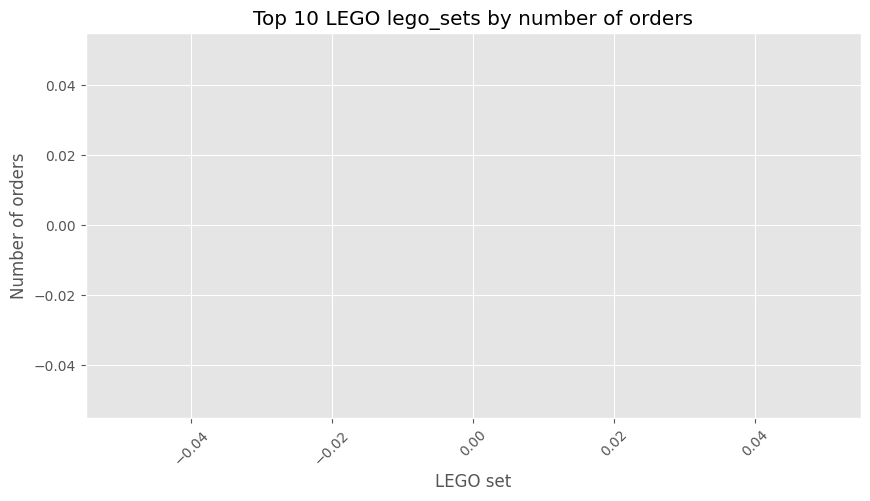

In [8]:
# TESTOWE


# In terms of revenues

from collections import Counter, defaultdict
import re


max_monthly_revenues = max(monthly_revenues.values())

for key, value in monthly_revenues.items():
    if value == max_monthly_revenues:
        print(f'The best month in terms of revenues comes is: {key} and amounts to {value}\n')




# In terms of units sold
lego_sets = {}
lego_sets = defaultdict(int)

all_products = np.concatenate([np.array(df[col].dropna()) for col in  [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]])
# for col in [f'product_name {i}' for i in range(1, 16) if f'product_name {i}' in df.columns]:
#     products = np.array(df[col].dropna())
    
pattern = re.compile(r'^(LEGO \d+)')
    
wanted_products = [pattern.match(product_name).group(1) for product_name in all_products if (isinstance(product_name, str) and pattern.match(product_name))]
counted_unique_products = dict(Counter(wanted_products))


print("banana")
    # for product_name in products:
    #     if isinstance(product_name, str) and product_name.startswith('LEGO'):
    #         product_code = product_name[5:9]
            
    #         if product_code.isdigit() and len(product_code) in [3, 4]:
    #             product = f'LEGO {product_code}'
                
    #             # if product not in lego_sets:
    #             #     lego_sets[product] = 0
                
    #             sum_value = (df[col] == product_name).sum()
    #             lego_sets[product] += sum_value

sorted_product = dict(sorted(lego_sets.items(), key=lambda item: item[1], reverse=True))
# print(sorted_product)
# print(lego_sets)


results_df = pd.DataFrame(list(sorted_product.items()), columns=['LEGO set', 'Number of orders'])

top_10_df = results_df.head(10)
print(top_10_df)

plt.figure(figsize=(10,5))
plt.bar(top_10_df['LEGO set'], top_10_df['Number of orders'])
plt.title('Top 10 LEGO lego_sets by number of orders')
plt.xlabel('LEGO set')
plt.ylabel('Number of orders')
plt.xticks(rotation = 45)
plt.show()

THE BEST CITY FOR SALES

{'Warszawa': 85, 'Wrocław': 50, 'Kraków': 36, 'Poznań': 33, 'Łódź': 23, 'Szczecin': 20, 'Gdańsk': 17, 'Lublin': 12, 'Płock': 9, 'Katowice': 8, 'Częstochowa': 8, 'Tomaszów mazowiecki': 8, 'Olsztyn': 7, 'Zabrze': 7, 'Kielce': 7, 'Pabianice': 6, 'Słupsk': 6, 'Siemianowice śląskie': 6, 'Gdynia': 6, 'Gniezno': 6, 'Zagórów': 5, 'Mogielnica': 5, 'Sosnowiec': 5, 'Niegowonice': 5, 'Zielona góra': 5, 'Międzychód': 5, 'Toruń': 4, 'Chojnice': 4, 'Opole': 4, 'Inowrocław': 4, 'Pielgrzymowice': 4, 'Łask': 4, 'Rokietnica': 4, 'Suwałki': 4, 'Mińsk mazowiecki': 4, 'Rzeszów': 3, 'Tychy': 3, 'Bydgoszcz': 3, 'Orły': 3, 'Grodzisk mazowiecki': 3, 'Wieliczka': 3, 'Zduńska wola': 3, 'Bełchatów': 3, 'Zelów': 3, 'Ostrowiec świętokrzyski': 3, 'Zręcin': 3, 'Chorzów': 3, 'Zgierz': 3, 'Rybnik': 3, 'Przeworsk': 3, 'Bochnia': 3, 'Szamotuły': 3, 'Pilica': 3, 'Bielsko-biała': 3, 'Wieluń': 3, 'Krakow': 3, 'Pruszków': 3, 'Połczyno bis': 3, 'Przemyśl': 3, 'Golasowice': 3, 'Myślenice': 3, 'Gębice': 3, 'Miłkowice': 3, 'Opató

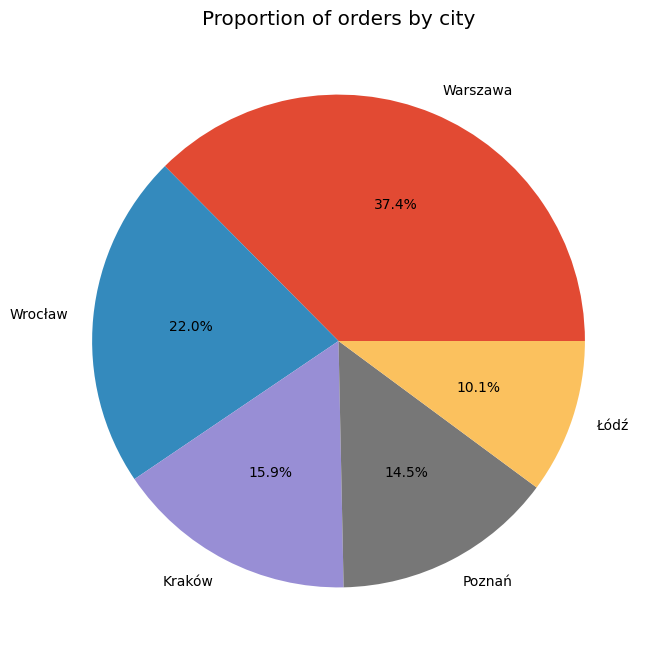

In [9]:
cities = {}
sum_array = []

for index, row in df.drop_duplicates(subset=['city']).iterrows():
    city = row['city'].capitalize()
    cities[city] = {}
    
    sum_value = df[df['city'].str.capitalize() == city]['order_id'].count()
    cities[city] = sum_value
 

sorted_cities = dict(sorted(cities.items(), key=lambda item: item[1], reverse=True))
print(sorted_cities)

top_5_cities = list(sorted_cities.items())[:5]

labels = [item[0] for item in top_5_cities]
sizes = [item[1] for item in top_5_cities]


plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of orders by city')
plt.show()